This is a notebook for testing prototypes of the work to be done

In [11]:
import pandas as pd

In [ ]:
# Change according to the directory your data is stored in
data_dir = r"C:\Users\Jani\EPIC-KITCHENS"
annotations_dir = data_dir + r"\annotations"

train_annotations_df = pd.read_csv(annotations_dir + r"\EPIC_100_train.csv")
train_annotations_df.head()

,narration_id,participant_id,video_id,narration_timestamp,start_timestamp,stop_timestamp,start_frame,stop_frame,narration,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,P01_01_0,P01,P01_01,00:00:01.089,00:00:00.14,00:00:03.37,8,202,open door,open,3,door,3,['door'],[3]
1,P01_01_1,P01,P01_01,00:00:02.629,00:00:04.37,00:00:06.17,262,370,turn on light,turn-on,6,light,114,['light'],[114]
2,P01_01_10,P01,P01_01,00:00:23.340,00:00:24.97,00:00:26.20,1498,1572,open drawer,open,3,drawer,8,['drawer'],[8]
3,P01_01_100,P01,P01_01,00:07:57.919,00:07:59.75,00:08:00.88,28785,28852,take cup,take,0,cup,13,['cup'],[13]
4,P01_01_101,P01,P01_01,00:08:00.020,00:08:01.47,00:08:02.21,28888,28932,open cupboard,open,3,cupboard,3,['cupboard'],[3]


In [17]:
import os

p01_rgb_frames_super_dir = data_dir + r"\P01\rgb_frames"
os.listdir(p01_rgb_frames_super_dir)[:5]

['extract_tar_files.ps1', 'P01_01', 'P01_01.tar', 'P01_02', 'P01_02.tar']

In [26]:
import re

def find_matching_directories(directory):
    # Define the regex pattern for directories matching P[numbers]_[numbers]
    pattern = re.compile(r"^P\d+_\d+$")
    
    # List all items in the directory
    all_items = os.listdir(directory)
    
    # Filter directories matching the pattern
    matching_dirs = [item for item in all_items if os.path.isdir(os.path.join(directory, item)) and pattern.match(item)]
    
    return matching_dirs

p01_frame_dirs = find_matching_directories(p01_rgb_frames_super_dir)
print(p01_frame_dirs)

['P01_01', 'P01_02', 'P01_03', 'P01_04', 'P01_05', 'P01_06', 'P01_07', 'P01_08', 'P01_09', 'P01_10', 'P01_102', 'P01_103', 'P01_104', 'P01_105']


In [31]:
os.listdir(os.path.join(p01_rgb_frames_super_dir, p01_frame_dirs[0]))

['frame_0000000001.jpg',
 'frame_0000000002.jpg',
 'frame_0000000003.jpg',
 'frame_0000000004.jpg',
 'frame_0000000005.jpg',
 'frame_0000000006.jpg',
 'frame_0000000007.jpg',
 'frame_0000000008.jpg',
 'frame_0000000009.jpg',
 'frame_0000000010.jpg',
 'frame_0000000011.jpg',
 'frame_0000000012.jpg',
 'frame_0000000013.jpg',
 'frame_0000000014.jpg',
 'frame_0000000015.jpg',
 'frame_0000000016.jpg',
 'frame_0000000017.jpg',
 'frame_0000000018.jpg',
 'frame_0000000019.jpg',
 'frame_0000000020.jpg',
 'frame_0000000021.jpg',
 'frame_0000000022.jpg',
 'frame_0000000023.jpg',
 'frame_0000000024.jpg',
 'frame_0000000025.jpg',
 'frame_0000000026.jpg',
 'frame_0000000027.jpg',
 'frame_0000000028.jpg',
 'frame_0000000029.jpg',
 'frame_0000000030.jpg',
 'frame_0000000031.jpg',
 'frame_0000000032.jpg',
 'frame_0000000033.jpg',
 'frame_0000000034.jpg',
 'frame_0000000035.jpg',
 'frame_0000000036.jpg',
 'frame_0000000037.jpg',
 'frame_0000000038.jpg',
 'frame_0000000039.jpg',
 'frame_0000000040.jpg',


In [25]:
row = train_annotations_df.iloc[0]
row

narration_id               P01_01_0
participant_id                  P01
video_id                     P01_01
narration_timestamp    00:00:01.089
start_timestamp         00:00:00.14
stop_timestamp          00:00:03.37
start_frame                       8
stop_frame                      202
narration                 open door
verb                           open
verb_class                        3
noun                           door
noun_class                        3
all_nouns                  ['door']
all_noun_classes                [3]
Name: 0, dtype: object

In [30]:
video_id = row["video_id"]
start_frame = row["start_frame"]
stop_frame = row["stop_frame"]

video_id, start_frame, stop_frame

('P01_01', np.int64(8), np.int64(202))

In [33]:
def get_frame_path(video_id, frame_num):
    filename = f"frame_{frame_num:010d}.jpg"
    return os.path.join(p01_rgb_frames_super_dir, video_id, filename)

get_frame_path(video_id, start_frame)

'C:\\Users\\Jani\\EPIC-KITCHENS\\P01\\rgb_frames\\P01_01\\frame_0000000008.jpg'

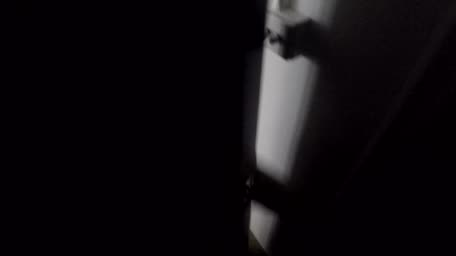

In [46]:
from PIL import Image

def get_frames_for_segment(video_id, start_frame, stop_frame):
    frames = []
    for i in range(start_frame, stop_frame + 1):
        frame_path = (get_frame_path(video_id, i))
        if os.path.exists(frame_path):
            frames.append(Image.open(frame_path).convert('RGB'))  # Might not need this. Will test later
        else:
            print(f"Missing frame: {i}")
    return frames

frames = get_frames_for_segment(video_id, start_frame, stop_frame)
frames[194]

In [ ]:
import matplotlib.pyplot as plt

def show_frames(frames, start_frame):
    plt.figure(figsize=(8, 6))
    for i in range(len(frames)):
        img = frames[i]
        plt.imshow(img)
        plt.title(f"Video: {video_id} | Frame {start_frame + i}")
        plt.axis("off")
        plt.pause(0.5)  # display each frame for 0.5 seconds
        plt.clf()       # clear the figure for the next frame

    plt.close()

show_frames(frames, start_frame)